# RNN with stock price

## RNN
with Time Series data (many to one)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
tf.set_random_seed(777)  # reproducibility

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
# train Parameters
seq_length = 7     # 데이터 분석 기간
data_dim = 5       # open/ high/ low / volumn / close (마지막 데이터를 통해서 예측)
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [7]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('./stockprice.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

In [ ]:
# if "DISPLAY" not in os.environ:
#     # remove Travis CI Error
#     matplotlib.use('Agg')

    (Min Max Normalization)

    Parameters ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [8]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.01561974  0.03530366  0.03650384  0.2052792   0.04526157]] -> [ 0.04182254]
[[ 0.02946185  0.02585198  0.02121565  0.18494219  0.01055033]
 [ 0.00084512  0.          0.          0.20783365  0.        ]
 [ 0.01221018  0.02024455  0.0141731   0.21175047  0.01057949]
 [ 0.          0.02096719  0.0159631   0.19786681  0.02424832]
 [ 0.03182226  0.02804874  0.02993083  0.24270861  0.02692962]
 [ 0.01561974  0.03530366  0.03650384  0.2052792   0.04526157]
 [ 0.04764595  0.04776134  0.05415708  0.1993457   0.04182254]] -> [ 0.07428976]
[[ 0.00084512  0.          0.          0.20783365  0.        ]
 [ 0.01221018  0.02024455  0.0141731   0.21175047  0.01057949]
 [ 0.          0.02096719  0.0159631   0.19786681  0.02424832]
 [ 0.03182226  0.02804874  0.02993083  0.24270861  0.02692962]
 [ 0.01561974  0.03530366  0.03650384  0.2052792   0.04526157]
 [ 0.04764595  0.04776134  0.05415708  0.1993457   0.04182254]
 [ 0.03671794  0.06735843  0.05469703  0.20263512  0.07428976]] -> [ 0.12194108]
[

 [ 0.47193378  0.49432289  0.48894887  0.19034687  0.49064144]] -> [ 0.44963509]
[[ 0.49081734  0.48854207  0.48337349  0.26250784  0.486736  ]
 [ 0.47986612  0.48709686  0.48152786  0.16158466  0.4776721 ]
 [ 0.46730044  0.47367086  0.48445919  0.09538406  0.47962473]
 [ 0.47251664  0.4780788   0.48029243  0.09355562  0.49055392]
 [ 0.48737871  0.48565166  0.48680684  0.12980192  0.47673945]
 [ 0.47193378  0.49432289  0.48894887  0.19034687  0.49064144]
 [ 0.46861183  0.48273232  0.45581982  0.25521197  0.44963509]] -> [ 0.34952358]
[[ 0.47986612  0.48709686  0.48152786  0.16158466  0.4776721 ]
 [ 0.46730044  0.47367086  0.48445919  0.09538406  0.47962473]
 [ 0.47251664  0.4780788   0.48029243  0.09355562  0.49055392]
 [ 0.48737871  0.48565166  0.48680684  0.12980192  0.47673945]
 [ 0.47193378  0.49432289  0.48894887  0.19034687  0.49064144]
 [ 0.46861183  0.48273232  0.45581982  0.25521197  0.44963509]
 [ 0.42291858  0.41642633  0.36611587  0.38158107  0.34952358]] -> [ 0.28287009]
[

In [9]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

In [11]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [12]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [13]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 83.7125473022461
[step: 1] loss: 40.165771484375
[step: 2] loss: 14.83617115020752
[step: 3] loss: 4.347233772277832
[step: 4] loss: 4.6733808517456055
[step: 5] loss: 10.142860412597656
[step: 6] loss: 14.430902481079102
[step: 7] loss: 14.795209884643555
[step: 8] loss: 12.097989082336426
[step: 9] loss: 8.227912902832031
[step: 10] loss: 4.723766326904297
[step: 11] loss: 2.4249751567840576
[step: 12] loss: 1.5312609672546387
[step: 13] loss: 1.793663740158081
[step: 14] loss: 2.7270967960357666
[step: 15] loss: 3.803187608718872
[step: 16] loss: 4.602985858917236
[step: 17] loss: 4.9007086753845215
[step: 18] loss: 4.666608810424805
[step: 19] loss: 4.016657829284668
[step: 20] loss: 3.1457417011260986
[step: 21] loss: 2.265699863433838
[step: 22] loss: 1.556268572807312
[step: 23] loss: 1.131212830543518
[step: 24] loss: 1.0211440324783325
[step: 25] loss: 1.1748933792114258
[step: 26] loss: 1.4803639650344849
[step: 27] loss: 1.8013248443603516
[step: 28] loss: 2.

[step: 247] loss: 0.7586607933044434
[step: 248] loss: 0.7577517628669739
[step: 249] loss: 0.7568433284759521
[step: 250] loss: 0.7559357285499573
[step: 251] loss: 0.7550287842750549
[step: 252] loss: 0.7541224360466003
[step: 253] loss: 0.7532167434692383
[step: 254] loss: 0.7523119449615479
[step: 255] loss: 0.7514076828956604
[step: 256] loss: 0.7505043148994446
[step: 257] loss: 0.7496015429496765
[step: 258] loss: 0.7486994862556458
[step: 259] loss: 0.7477983236312866
[step: 260] loss: 0.74689781665802
[step: 261] loss: 0.7459981441497803
[step: 262] loss: 0.7450991868972778
[step: 263] loss: 0.7442011833190918
[step: 264] loss: 0.7433039546012878
[step: 265] loss: 0.7424073219299316
[step: 266] loss: 0.7415118217468262
[step: 267] loss: 0.740617036819458
[step: 268] loss: 0.7397230863571167
[step: 269] loss: 0.7388299107551575
[step: 270] loss: 0.7379376888275146
[step: 271] loss: 0.737046480178833
[step: 272] loss: 0.7361560463905334
[step: 273] loss: 0.7352665662765503
[step

RMSE: 0.027509840205311775


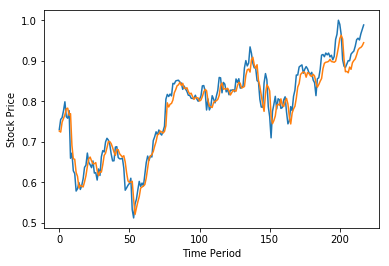

In [14]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()